In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [2]:
ogrenciler = pd.read_csv("StudentsPerformance.csv")
ogrenciler.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


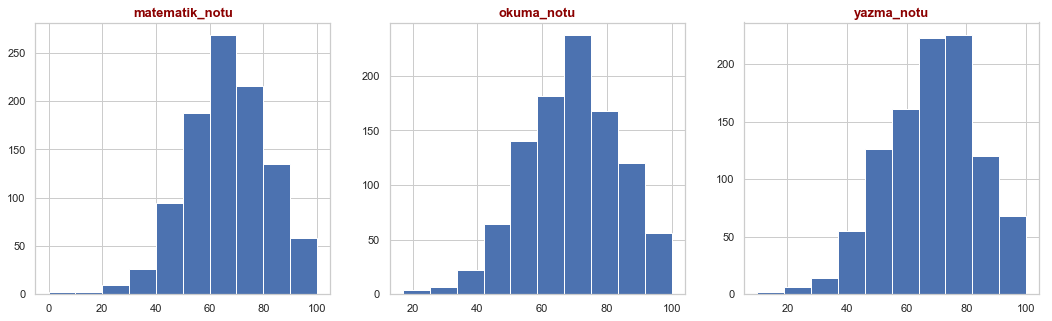

In [3]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(18,5))

sinav_sonuc = ['matematik_notu', 'okuma_notu' , 'yazma_notu']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(ogrenciler[sinav_sonuc[i]])
    plt.title(sinav_sonuc[i], fontdict=baslik_font)
    

In [4]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ['matematik_notu', 'okuma_notu' , 'yazma_notu']
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(ogrenciler[ozellik]))
    norm_stats = normaltest(np.log(ogrenciler[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,matematik_notu,nan,nan,nan,nan
1,okuma_notu,495.12732,0.00000,209.77151,0.00000
2,yazma_notu,1410.93701,0.00000,318.96921,0.00000


In [5]:
ogrenciler['not_ortalama']=(ogrenciler['matematik_notu']+ogrenciler['okuma_notu']+ogrenciler['yazma_notu'])/3

In [6]:
ogrenciler

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu,not_ortalama
0,female,group B,bachelor's degree,standard,none,72,72,74,72.66667
1,female,group C,some college,standard,completed,69,90,88,82.33333
2,female,group B,master's degree,standard,none,90,95,93,92.66667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33333
4,male,group C,some college,standard,none,76,78,75,76.33333
5,female,group B,associate's degree,standard,none,71,83,78,77.33333
6,female,group B,some college,standard,completed,88,95,92,91.66667
7,male,group B,some college,free/reduced,none,40,43,39,40.66667
8,male,group D,high school,free/reduced,completed,64,64,67,65.00000
9,female,group B,high school,free/reduced,none,38,60,50,49.33333


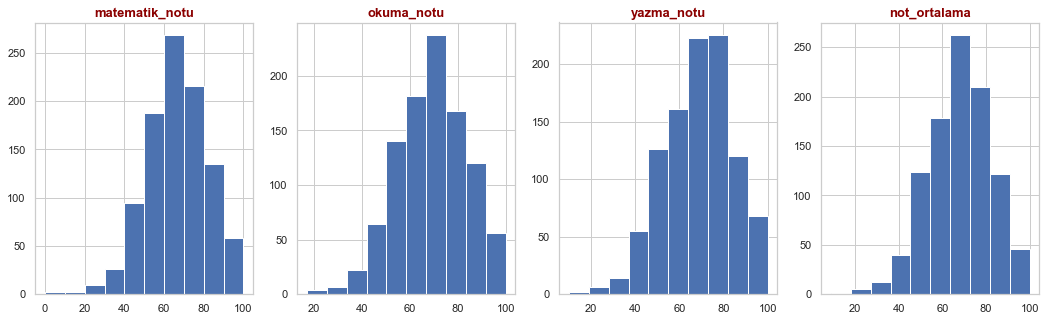

In [7]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(18,5))

sinav_sonuc = ['matematik_notu', 'okuma_notu' , 'yazma_notu','not_ortalama']

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.hist(ogrenciler[sinav_sonuc[i]])
    plt.title(sinav_sonuc[i], fontdict=baslik_font)
    

3. soru

In [8]:
korelasyon_mat_ogrenciler = ogrenciler.corr()
display(korelasyon_mat_ogrenciler)

,matematik_notu,okuma_notu,yazma_notu,not_ortalama
matematik_notu,1.00000,0.81758,0.80264,0.91875
okuma_notu,0.81758,1.00000,0.95460,0.97033
yazma_notu,0.80264,0.95460,1.00000,0.96567
not_ortalama,0.91875,0.97033,0.96567,1.00000


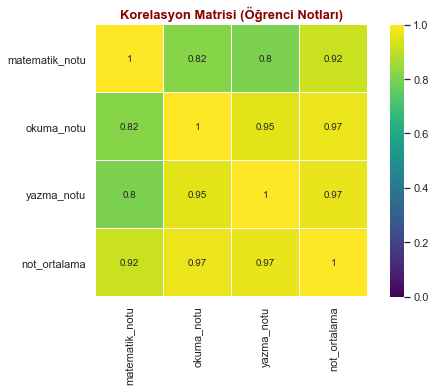

In [9]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,2)
sns.heatmap(korelasyon_mat_ogrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)", fontdict=baslik_font)

plt.show()

3. soru

In [10]:
ogrenciler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
cinsiyet             1000 non-null object
koken                1000 non-null object
aile_egt_seviyesi    1000 non-null object
ogle_yemegi          1000 non-null object
hazirlik_kursu       1000 non-null object
matematik_notu       1000 non-null int64
okuma_notu           1000 non-null int64
yazma_notu           1000 non-null int64
not_ortalama         1000 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


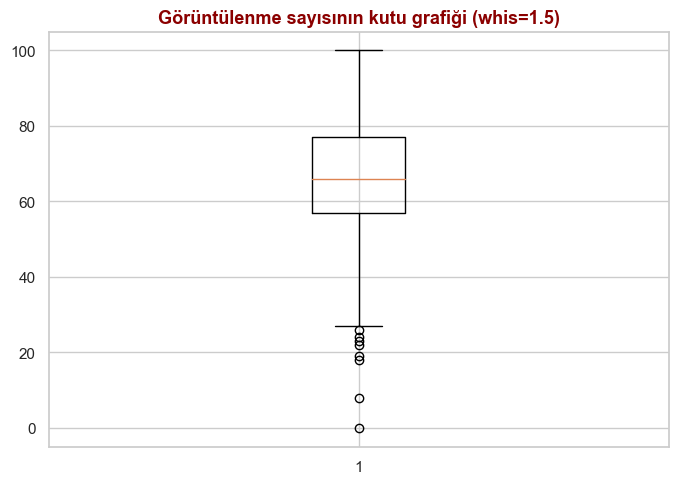

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

plt.boxplot(ogrenciler["matematik_notu"], )
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()


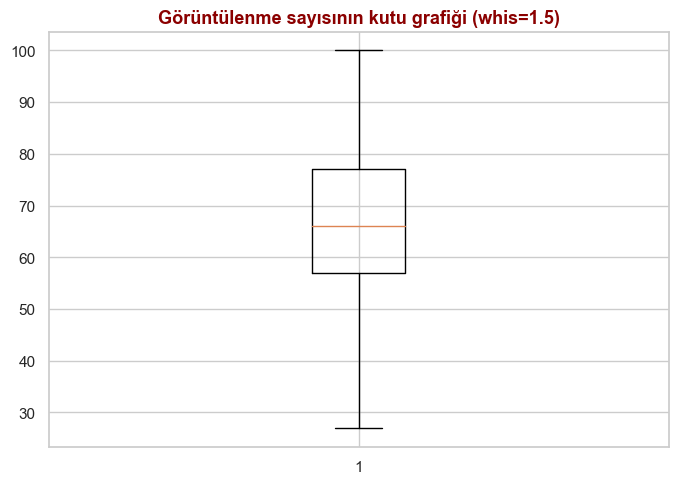

In [24]:
from scipy.stats.mstats import winsorize

winsorize_mat = winsorize(ogrenciler["matematik_notu"], (0.008, 0))

plt.boxplot(winsorize_mat)
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()
ogrenciler["winsorize_matnotu"]=winsorize_mat

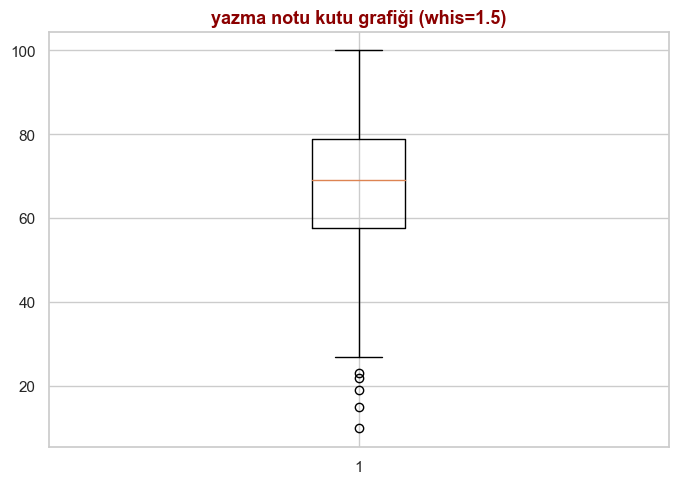

In [26]:
plt.boxplot(ogrenciler["yazma_notu"], )
plt.title("yazma notu kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

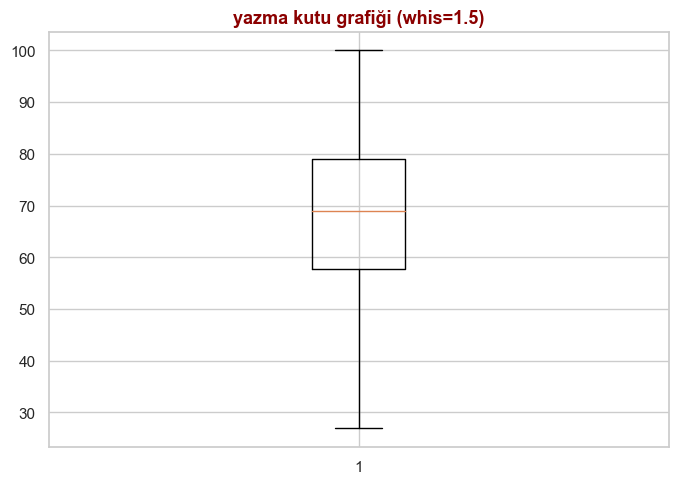

In [33]:
winsorize_yazma = winsorize(ogrenciler["yazma_notu"], (0.005, 0))

plt.boxplot(winsorize_yazma)
plt.title("yazma kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()
ogrenciler["winsorize_yazmanotu"]=winsorize_yazma


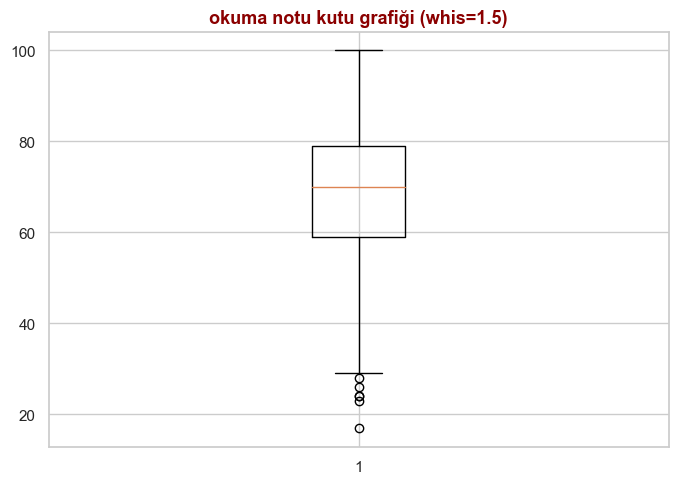

In [34]:
plt.boxplot(ogrenciler["okuma_notu"], )
plt.title("okuma notu kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

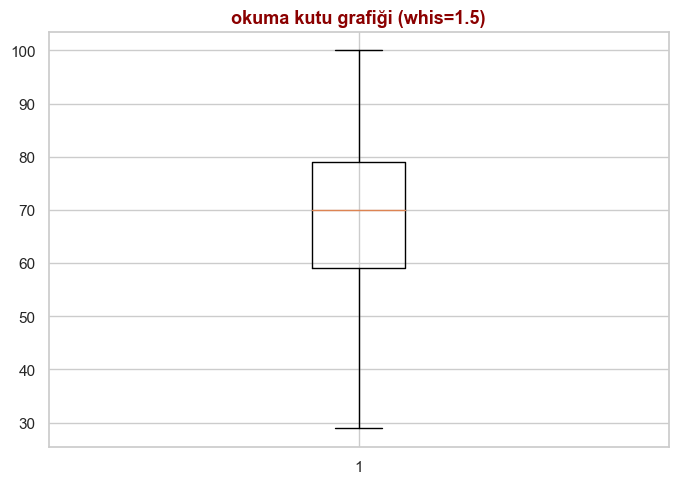

In [37]:
winsorize_okuma = winsorize(ogrenciler["okuma_notu"], (0.006, 0))

plt.boxplot(winsorize_okuma)
plt.title("okuma kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()
ogrenciler["winsorize_okumanotu"]=winsorize_okuma

In [38]:
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu,not_ortalama,winsorize_matnotu,winsorize_yazmanotu,winsorize_okumanotu
0,female,group B,bachelor's degree,standard,none,72,72,74,72.66667,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82.33333,69,88,90
2,female,group B,master's degree,standard,none,90,95,93,92.66667,90,93,95
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33333,47,44,57
4,male,group C,some college,standard,none,76,78,75,76.33333,76,75,78


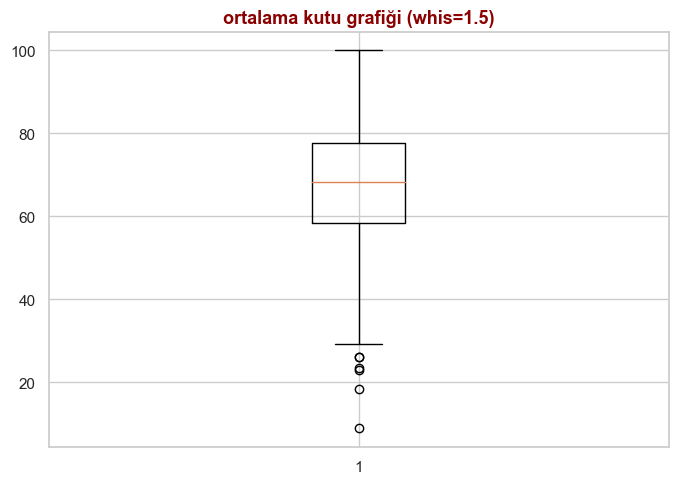

In [39]:
plt.boxplot(ogrenciler["not_ortalama"], )
plt.title("ortalama kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

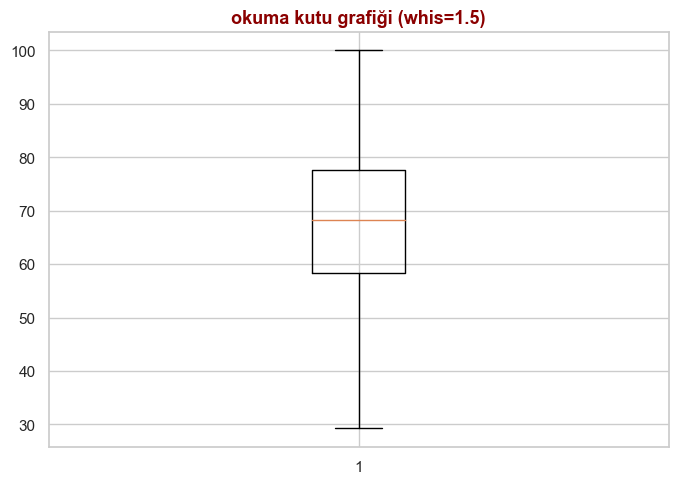

In [43]:
winsorize_mean = winsorize(ogrenciler["not_ortalama"], (0.006, 0))

plt.boxplot(winsorize_mean)
plt.title("okuma kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()
ogrenciler["winsorize_ortalama"]=winsorize_mean

In [44]:
ogrenciler.groupby("cinsiyet").mean()

,matematik_notu,okuma_notu,yazma_notu,not_ortalama,winsorize_matnotu,winsorize_yazmanotu,winsorize_okumanotu,winsorize_ortalama
cinsiyet,,,,,,,,
female,63.63320,72.60811,72.46718,69.56950,63.77992,72.50772,72.64093,69.63642
male,68.72822,65.47303,63.31120,65.83748,68.72822,63.36307,65.50415,65.86999


In [45]:
# Test whether group differences are significant.
cinsiyetler = ogrenciler["cinsiyet"].unique()


In [47]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_matnotu", "winsorize_yazmanotu", "winsorize_okumanotu","winsorize_ortalama"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(cinsiyetler)):
        for j in range(i+1, len(cinsiyetler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["cinsiyet"]==cinsiyetler[i]][var], 
                                ogrenciler[ogrenciler["cinsiyet"]==cinsiyetler[j]][var])
            grup_1 = cinsiyetler[i]
            grup_2 = cinsiyetler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

winsorize_matnotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,-5.310535876060364,0.000000134750365


winsorize_yazmanotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,10.070129701462065,0.000000000000000


winsorize_okumanotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,8.017817458844153,0.000000000000003


winsorize_ortalama için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,4.257385957022370,0.000022634107688


In [48]:
# Test whether group differences are significant.
kokenler = ogrenciler["koken"].unique()

In [49]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_matnotu", "winsorize_yazmanotu", "winsorize_okumanotu","winsorize_ortalama"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(kokenler)):
        for j in range(i+1, len(kokenler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["koken"]==kokenler[i]][var], 
                                ogrenciler[ogrenciler["koken"]==kokenler[j]][var])
            grup_1 = kokenler[i]
            grup_2 = kokenler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

winsorize_matnotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-0.660262929982958,0.509384966534690
1,group B,group A,1.083296909644670,0.279618706007309
2,group B,group D,-2.722044521175839,0.006739796611040
3,group B,group E,-6.018383436194841,0.000000004711319
4,group C,group A,1.686593752943236,0.092449671688764
5,group C,group D,-2.370354523210184,0.018097650228447
6,group C,group E,-6.156330416025229,0.000000001631057
7,group A,group D,-3.350939193259120,0.000893518613900
8,group A,group E,-5.936141025544798,0.000000010835591
9,group D,group E,-4.281864611479552,0.000023229788907


winsorize_yazmanotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.595341381370089,0.111259039951589
1,group B,group A,1.482186575088877,0.139427384629027
2,group B,group D,-3.162170109515821,0.001671866614301
3,group B,group E,-3.395860636777749,0.000768186723056
4,group C,group A,2.864714485781062,0.004390613808277
5,group C,group D,-1.858699939689076,0.063576884006234
6,group C,group E,-2.363471656188449,0.018522234667801
7,group A,group D,-4.123153373194921,0.000046747688008
8,group A,group E,-4.241879809556360,0.000032288311682
9,group D,group E,-0.849621112558431,0.396043991677996


winsorize_okumanotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.325968347576890,0.185447246778753
1,group B,group A,1.369458286144531,0.171965283262395
2,group B,group D,-1.915279742917269,0.056090379341139
3,group B,group E,-3.392450686238462,0.000777480512643
4,group C,group A,2.585625647803111,0.010067785468824
5,group C,group D,-0.766025404104971,0.443973357145462
6,group C,group E,-2.721399101476357,0.006748859187927
7,group A,group D,-3.018305686526519,0.002728838816210
8,group A,group E,-4.077718017028952,0.000062946009875
9,group D,group E,-2.028437097556392,0.043177738126078


winsorize_ortalama için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.266263441551593,0.206000259454785
1,group B,group A,1.362908883761751,0.174018124869465
2,group B,group D,-2.747455312697415,0.006247138174337
3,group B,group E,-4.471215496580418,0.000010730403440
4,group C,group A,2.502311593186470,0.012730854812385
5,group C,group D,-1.766309063880451,0.077870896059459
6,group C,group E,-3.957366062298074,0.000087839649876
7,group A,group D,-3.690104461718688,0.000259959791591
8,group A,group E,-4.975185888338642,0.000001287085049
9,group D,group E,-2.508632357018624,0.012514685677158


In [50]:
# Test whether group differences are significant.
aile_egt_seviyeleri = ogrenciler["aile_egt_seviyesi"].unique()

In [51]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_matnotu", "winsorize_yazmanotu", "winsorize_okumanotu","winsorize_ortalama"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(aile_egt_seviyeleri)):
        for j in range(i+1, len(aile_egt_seviyeleri)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["aile_egt_seviyesi"]==aile_egt_seviyeleri[i]][var], 
                                ogrenciler[ogrenciler["aile_egt_seviyesi"]==aile_egt_seviyeleri[j]][var])
            grup_1 = aile_egt_seviyeleri[i]
            grup_2 = aile_egt_seviyeleri[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

winsorize_matnotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,1.345983343700200,0.179199416042691
1,bachelor's degree,master's degree,-0.148681965688493,0.881975782486770
2,bachelor's degree,associate's degree,0.876511414963726,0.381374589547435
3,bachelor's degree,high school,4.230761204843056,0.000030651437467
4,bachelor's degree,some high school,3.161063119985783,0.001735446985933
5,some college,master's degree,-1.220169825633967,0.223416287375417
6,some college,associate's degree,-0.507760653923349,0.611872213250171
7,some college,high school,3.568116366033245,0.000401023606231
8,some college,some high school,2.368431607139583,0.018334656350808
9,master's degree,associate's degree,0.839634012181893,0.401832508542939


winsorize_yazmanotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.672352252364612,0.007892885443009
1,bachelor's degree,master's degree,-0.999874130680484,0.318751964146466
2,bachelor's degree,associate's degree,2.115929663913376,0.035081624517197
3,bachelor's degree,high school,6.565213423270428,0.000000000216757
4,bachelor's degree,some high school,4.667320283520179,0.000004636861346
5,some college,master's degree,-3.171293893772124,0.001684405093808
6,some college,associate's degree,-0.738889770752703,0.460362600466045
7,some college,high school,4.507508596765857,0.000008517769641
8,some college,some high school,2.555595785269057,0.010966790180667
9,master's degree,associate's degree,2.781241549068550,0.005784032705258


winsorize_okumanotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.195307226690131,0.028813038206858
1,bachelor's degree,master's degree,-1.054085894947598,0.293296751317879
2,bachelor's degree,associate's degree,1.297796985045283,0.195242064830911
3,bachelor's degree,high school,5.017345998620873,0.000000881408456
4,bachelor's degree,some high school,3.389958191609148,0.000794259183176
5,some college,master's degree,-2.889477008545151,0.004157299043840
6,some college,associate's degree,-1.092644607715109,0.275139707840730
7,some college,high school,3.471863515683288,0.000570454146710
8,some college,some high school,1.696820469794168,0.090502749455465
9,master's degree,associate's degree,2.191201575983869,0.029264145709722


winsorize_ortalama için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.192338947551772,0.029028455013448
1,bachelor's degree,master's degree,-0.759476950033905,0.448589132120201
2,bachelor's degree,associate's degree,1.501300964598319,0.134211315162234
3,bachelor's degree,high school,5.547561701277728,0.000000061869620
4,bachelor's degree,some high school,3.929624636644112,0.000106041124884
5,some college,master's degree,-2.558619712331734,0.011029483516472
6,some college,associate's degree,-0.826562830830168,0.408926860679620
7,some college,high school,4.048600787306529,0.000061355718795
8,some college,some high school,2.310095664126306,0.021387330005986
9,master's degree,associate's degree,2.014634576109426,0.044902247757125


In [52]:
# Test whether group differences are significant.
ogle_yemekleri = ogrenciler["ogle_yemegi"].unique()

In [53]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_matnotu", "winsorize_yazmanotu", "winsorize_okumanotu","winsorize_ortalama"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(ogle_yemekleri)):
        for j in range(i+1, len(ogle_yemekleri)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["ogle_yemegi"]==ogle_yemekleri[i]][var], 
                                ogrenciler[ogrenciler["ogle_yemegi"]==ogle_yemekleri[j]][var])
            grup_1 = ogle_yemekleri[i]
            grup_2 = ogle_yemekleri[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

winsorize_matnotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,11.833770286241137,0.000000000000000


winsorize_yazmanotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,7.971849225146030,0.000000000000004


winsorize_okumanotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,7.416384984154218,0.000000000000257


winsorize_ortalama için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,9.537337649301124,0.000000000000000


In [54]:

hazirlik_kursları = ogrenciler["hazirlik_kursu"].unique()

In [55]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_matnotu", "winsorize_yazmanotu", "winsorize_okumanotu","winsorize_ortalama"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(hazirlik_kursları)):
        for j in range(i+1, len(hazirlik_kursları)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["hazirlik_kursu"]==hazirlik_kursları[i]][var], 
                                ogrenciler[ogrenciler["hazirlik_kursu"]==hazirlik_kursları[j]][var])
            grup_1 = hazirlik_kursları[i]
            grup_2 = hazirlik_kursları[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

winsorize_matnotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-5.692029799391047,0.000000016497247


winsorize_yazmanotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-10.434513790334764,0.000000000000000


winsorize_okumanotu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-7.870411917143238,0.000000000000009


winsorize_ortalama için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-8.398931053501787,0.000000000000000
